In [37]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [38]:
df = pd.read_csv("housing.csv")
df.head(5)

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
0,0.02731 0.00 7.070 0 0.4690 6.4210 78...
1,0.02729 0.00 7.070 0 0.4690 7.1850 61...
2,0.03237 0.00 2.180 0 0.4580 6.9980 45...
3,0.06905 0.00 2.180 0 0.4580 7.1470 54...
4,0.02985 0.00 2.180 0 0.4580 6.4300 58...


In [39]:
df.shape


(505, 1)

In [40]:
df_split = df.iloc[:, 0].str.split(expand=True).astype(float)
df_split.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
2,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
3,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
4,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7


In [41]:
X = df_split.iloc[:, :-1]  # Features
y = df_split.iloc[:, -1]   # Target


In [42]:
# scaler = StandardScaler()
# x_scale = scaler.fit_transform(X)

In [43]:
df.describe()

,0.00632 18.00 2.310 0 0.5380 6.5750 65.20 4.0900 1 296.0 15.30 396.90 4.98 24.00
count,505
unique,505
top,0.02731 0.00 7.070 0 0.4690 6.4210 78...
freq,1


In [44]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [45]:
# x_train, x_test, y_train, y_test = train_test_split(x_scale,y,test_size=0.2)

In [46]:
from sklearn.linear_model import LinearRegression


In [47]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [48]:
lr.predict(x_test)

array([21.84496979, 28.82832894, 23.55245815, 20.56469878, 30.43101083,
       16.91886564, 33.32743753, 14.81704925, 32.68261513, 16.75392697,
       23.40377791, 22.68329868, 14.10311334, 28.42326535, 29.13321629,
       18.67034328, 21.17325524, 19.42384931, 21.48062586, 20.72023346,
       24.78370665, 15.98677468, 33.29835996, 18.60552537, 22.13383646,
       11.69147575, 14.44399424, 33.45737504, 25.2109968 , 26.00335583,
       35.06398119, 30.63752225, 24.40903597, 12.48570642, 14.56693695,
       21.15044518, 17.48960656, 36.60128759,  4.59902007, 21.02206556,
       42.63660448, 37.09719987, 15.62857987, 17.0692681 , 13.95140181,
        7.20695163, 23.70353425, 18.39430805, 14.93234567, 19.06905479,
       25.55670367, 23.59051238, 15.79009917, 28.06665087,  9.8151275 ,
       23.72807176, 34.56019353, 22.33051518, 26.7404849 , 24.98606264,
       38.69311981, 16.43885539,  7.09455565, 21.93398082, 16.20067054,
       22.03964097, 37.96894756, 14.54128844, 19.0542564 , 22.18

In [49]:
lr.score(x_test,y_test)

0.7404451355188693

In [50]:
0.7907051005512733

0.7907051005512733

In [63]:
model = RandomForestRegressor(n_estimators=100, random_state=11)
model.fit(x_train,y_train)


RandomForestRegressor(random_state=11)

In [64]:
pred = model.predict(x_test)

In [65]:
print("R2 Score:", r2_score(y_test,pred))


R2 Score: 0.9089461595311313


In [66]:
0.9230578212813142

0.9230578212813142

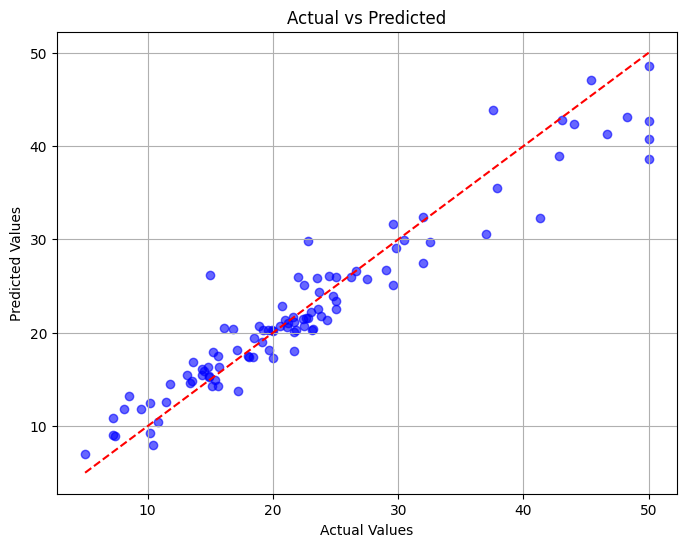

In [70]:
import matplotlib.pyplot as plt

y_pred = model.predict(x_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, pred, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted')
plt.grid(True)
plt.show()
